<a href="https://colab.research.google.com/gist/qbeer/545fa2d88e7541f81a137f6d0363e6c9/hw7_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.) Linear SVC in case of linear separation

* load the Iris dataset (can be found in sklearn API)
* scale the data and plot the petal length vs petal width in a scatterplot colored with the target
* train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
* visualize the model's decision boundary and the margins based on the coefficients learnt by the model
* interpret the results, what is the role of the C hyperparameter?

## 2.) Linear SVC but non-linear separation

* create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
* perform the same steps just as in the previous exercise and use the linear kernel for the SVC
* since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
* write down with your own words in few sentences how the support vector machine works

## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:

* you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels

* train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)

* generate prediction for the samples that were not used during the training

To-do now:

* build default SVC, but set it to predict probabilities
* plot the ROC curve and calculate the confusion matrix for the predictions
* do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
*how good is the performance of the new model?

## 4.) Scale data and try different kernels

* scale your data before applying the SVC model
* plot the ROC curve and calculate the confusion matrix for the predictions
* does your model perform better or worse after scaling?
* try out other kernels (linear, poly) and evaluate the performance of the model the same way

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

* prepare data as described in the title, then scale all inputs based on the training set
* select your best performing SVC model from the previous exercise
* check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
* create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
* select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

-------------------------------------------------
-------------------------------------------------
## 1.) Linear SVC in case of linear separation

* load the Iris dataset (can be found in sklearn API)
* scale the data and plot the petal length vs petal width in a scatterplot colored with the target
* train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
* visualize the model's decision boundary and the margins based on the coefficients learnt by the model
* interpret the results, what is the role of the C hyperparameter?
-------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets

data=datasets.load_iris()#load and return the iris dataset

In [3]:
iris=datasets.load_iris()

target_names=iris['target'].reshape(iris['target'].size,1)
target_names=np.asanyarray(target_names, dtype=object)
names=iris['target_names']
for i,v in enumerate(names): target_names[target_names==i]=v
    
data=np.concatenate((iris['data'], target_names,
                iris['target'].reshape(iris['target'].size,1)),axis=1)


DF=pd.DataFrame(data=data, columns=iris['feature_names']+['target name','target'])

display(DF.head(10))
display(DF.tail(10))

DF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target name,target
140,6.7,3.1,5.6,2.4,virginica,2
141,6.9,3.1,5.1,2.3,virginica,2
142,5.8,2.7,5.1,1.9,virginica,2
143,6.8,3.2,5.9,2.3,virginica,2
144,6.7,3.3,5.7,2.5,virginica,2
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target name,target
count,150.0,150.0,150.0,150.0,150,150
unique,35.0,23.0,43.0,22.0,3,3
top,5.0,3.0,1.4,0.2,virginica,0
freq,10.0,26.0,13.0,29.0,50,50


In [4]:
SDF=DF.copy()
mean=np.mean(SDF[SDF.columns.values[:-2]])
std=np.std(SDF[SDF.columns.values[:-2]])

SDF[SDF.columns.values[:-2]]=(SDF[SDF.columns.values[:-2]]-mean)/std
SDF.columns=['sepal length', 'sepal width', 'petal length','petal width', 'target name', 'target']
display(SDF)
print('\n mean \n',SDF.mean())
print('\n std \n',SDF.std())

,sepal length,sepal width,petal length,petal width,target name,target
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,0
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,0
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,0
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,0
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,2
146,0.553333,-1.282963,0.705921,0.922303,virginica,2
147,0.795669,-0.131979,0.819596,1.053935,virginica,2
148,0.432165,0.788808,0.933271,1.448832,virginica,2



 mean 
 sepal length   -1.690315e-15
sepal width    -1.862399e-15
petal length   -1.734168e-15
petal width    -1.409243e-15
target          1.000000e+00
dtype: float64

 std 
 sepal length    1.003350
sepal width     1.003350
petal length    1.003350
petal width     1.003350
target          0.819232
dtype: float64


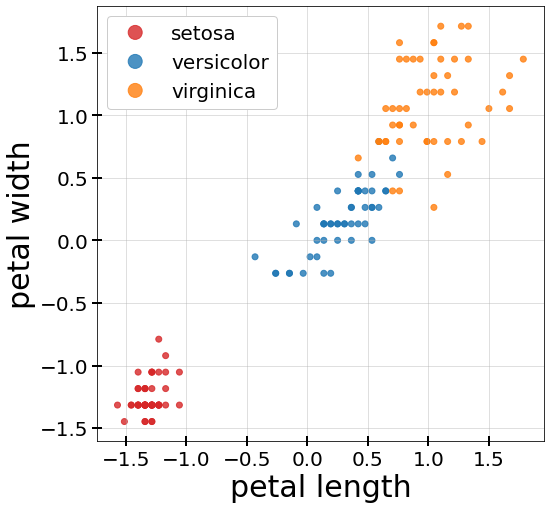

In [5]:
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
#to create custom legend
#https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend 
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
    
fig,ax=plt.subplots(1,1,figsize=(8,8))

norm = matplotlib.colors.Normalize(0,2)
newcmap=matplotlib.colors.ListedColormap(['tab:red', 'tab:blue','tab:orange'])


ax.scatter(SDF['petal length'],SDF['petal width'], marker='o', alpha=0.8, color=newcmap(np.asanyarray((SDF['target'].values),dtype=int)))

ax.set_xticks(np.arange(-1.5,1.51,0.5))
ax.set_yticks(np.arange(-1.5,1.51,0.5))
ax.set_xlabel('petal length', fontsize=30) 
ax.set_ylabel('petal width', fontsize=30)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(norm(i)), label = v) for i,v in enumerate(iris['target_names'])]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

ax.grid(alpha=0.5)
plt.show()

In [6]:
from sklearn.svm import SVC #C-Support Vector Classification

data=np.asarray(SDF[SDF.columns[-4:-2]].values,dtype=float)
labels=np.asarray(SDF['target'].values,dtype=int)

svc1    = SVC(kernel='linear', C=1) # Regularization parameter=1
svc1.fit(data,labels)

svc1000 = SVC(kernel='linear', C=1000) # Regularization parameter=1
svc1000.fit(data,labels)

print('C=1')
print('intercept: \n', svc1.intercept_)
print('w: \n', svc1.coef_)

print('-----------------------------')

print('C=1000')
print('intercept: \n', svc1000.intercept_)
print('w: \n', svc1000.coef_)

C=1
intercept: 
 [-1.65895313 -0.31466756  2.84959514]
w: 
 [[-1.35349272 -1.16861263]
 [-0.68487142 -0.60163267]
 [-2.09352075 -2.44252199]]
-----------------------------
C=1000
intercept: 
 [-1.80438229 -0.31466756  7.97214696]
w: 
 [[-1.49242209 -1.23441536]
 [-0.68487142 -0.60163267]
 [-7.03681346 -6.07627313]]


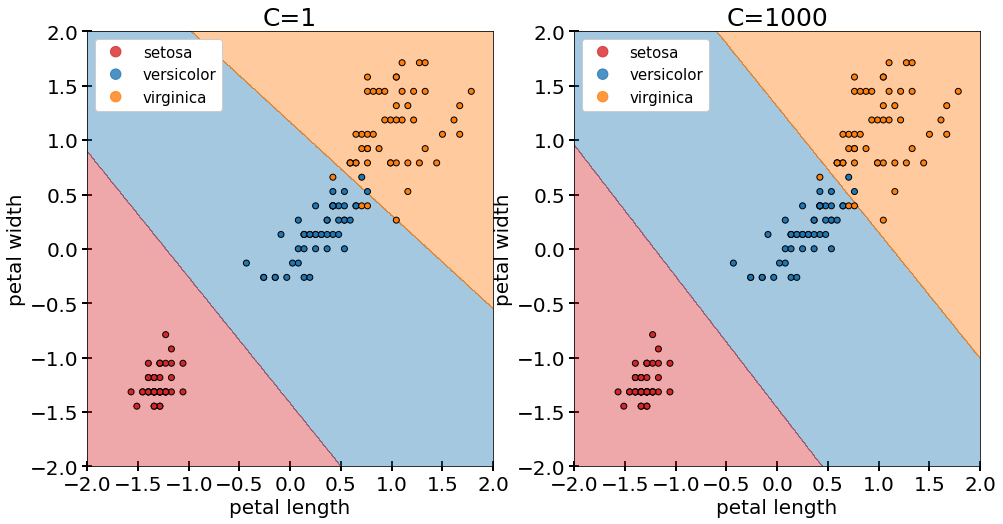

In [7]:
fig,axes=plt.subplots(1,2,figsize=(16,8))

norm = matplotlib.colors.Normalize(0,2)
newcmap=matplotlib.colors.ListedColormap(['tab:red', 'tab:blue','tab:orange'])

ax=axes[0]

ax.scatter(SDF['petal length'],SDF['petal width'], marker='o', alpha=1, edgecolors='k', color=newcmap(np.asanyarray((SDF['target'].values),dtype=int)), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('petal length', fontsize=20) 
ax.set_ylabel('petal width', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(norm(i)), label = v) for i,v in enumerate(iris['target_names'])]

ax.legend(framealpha=1, handles = patch, fontsize = 15, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)


ax=axes[1]

ax.scatter(SDF['petal length'],SDF['petal width'], marker='o', alpha=1, edgecolors='k', color=newcmap(np.asanyarray((SDF['target'].values),dtype=int)), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('petal length', fontsize=20) 
ax.set_ylabel('petal width', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(norm(i)), label = v) for i,v in enumerate(iris['target_names'])]

ax.legend(framealpha=1, handles = patch, fontsize = 15, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1000.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)

axes[0].set_title('C=1', fontsize=25)
axes[1].set_title('C=1000', fontsize=25)

plt.show()

---------------------------
---------------------------
## 2.) Linear SVC but non-linear separation

* create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
* perform the same steps just as in the previous exercise and use the linear kernel for the SVC
* since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
* write down with your own words in few sentences how the support vector machine works


In [8]:
X, y = datasets.make_moons(noise=0.1, random_state=0)

In [9]:
mean=X.mean(axis=0)
std=X.std(axis=0)
X=(X-mean)/std

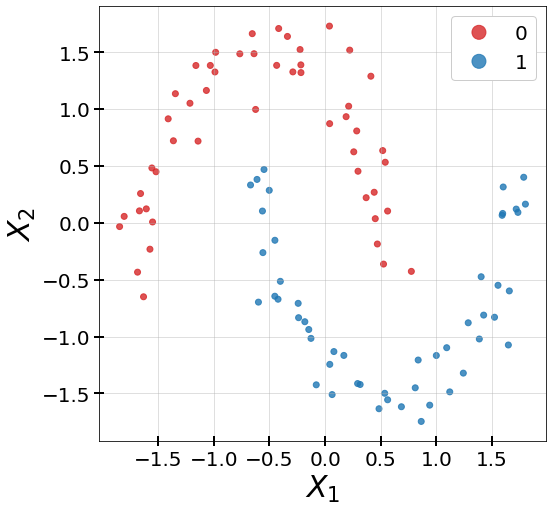

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,8))

norm = matplotlib.colors.Normalize(0,1)
newcmap=matplotlib.colors.ListedColormap(['tab:red', 'tab:blue'])


ax.scatter(X[:,0],X[:,1], marker='o', alpha=0.8, color=newcmap(y))

ax.set_xticks(np.arange(-1.5,1.51,0.5))
ax.set_yticks(np.arange(-1.5,1.51,0.5))
ax.set_xlabel('$X_1$', fontsize=30) 
ax.set_ylabel('$X_2$', fontsize=30)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

ax.grid(alpha=0.5)
plt.show()

In [11]:
svc1 = SVC(kernel='linear', C=1) # Regularization parameter=1
svc1.fit(X,y)

svc1000 = SVC(kernel='linear', C=1000) # Regularization parameter=1
svc1000.fit(X, y)

print('C=1')
print('intercept: \n', svc1.intercept_)
print('w: \n', svc1.coef_)

print('-----------------------------')

print('C=1000')
print('intercept: \n', svc1000.intercept_)
print('w: \n', svc1000.coef_)

C=1
intercept: 
 [0.05084613]
w: 
 [[ 0.6704074  -1.57086817]]
-----------------------------
C=1000
intercept: 
 [0.01371602]
w: 
 [[ 0.71695991 -1.91917437]]


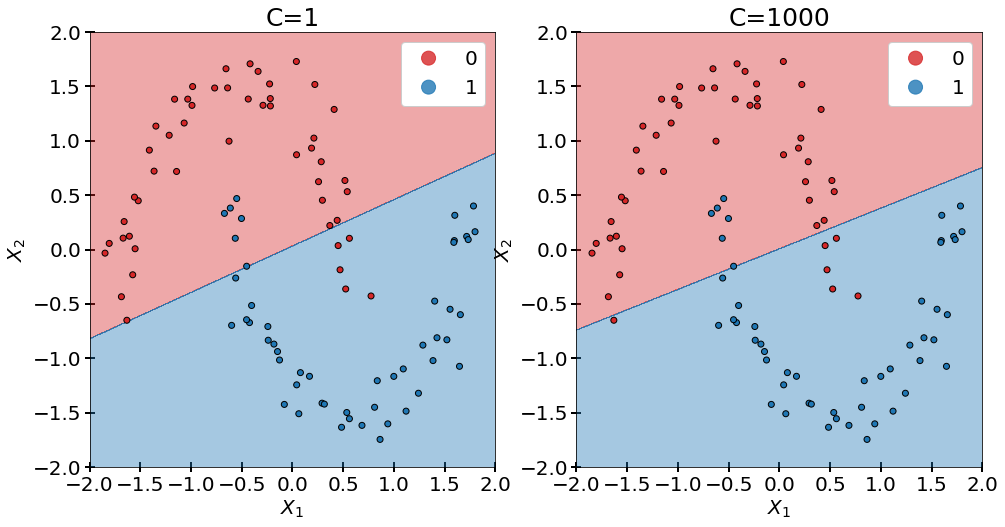

In [12]:
fig,axes=plt.subplots(1,2,figsize=(16,8))

ax=axes[0]

ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)


ax=axes[1]

ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1000.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)

axes[0].set_title('C=1', fontsize=25)
axes[1].set_title('C=1000', fontsize=25)

plt.show()

In [13]:
svc1 = SVC(kernel='poly', degree=3, C=1) # Regularization parameter=1
_=svc1.fit(X,y)

svc1000 = SVC(kernel='poly', degree=3, C=1000) # Regularization parameter=1
_=svc1000.fit(X, y)

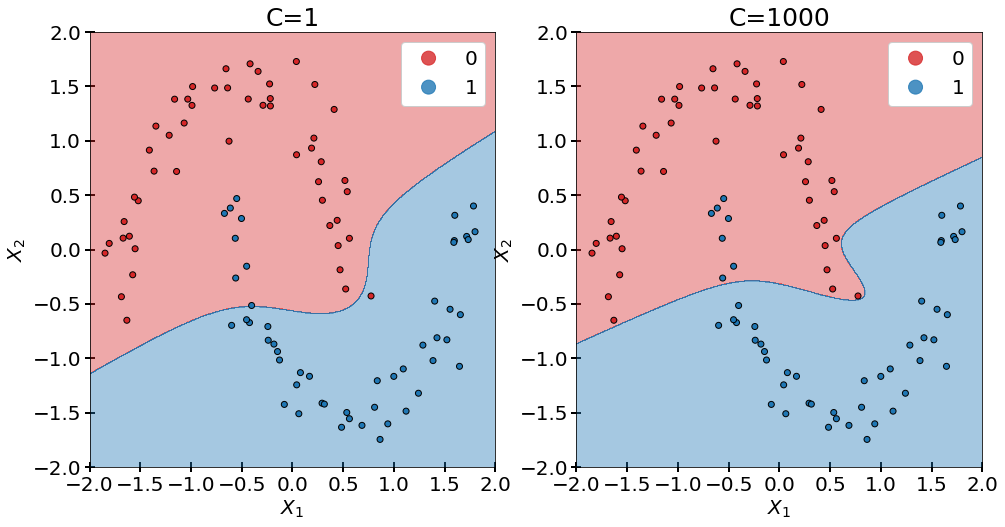

In [14]:
fig,axes=plt.subplots(1,2,figsize=(16,8))

ax=axes[0]

ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)


ax=axes[1]

ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = svc1000.predict(np.c_[xx.ravel(), yy.ravel()])
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)

axes[0].set_title('C=1', fontsize=25)
axes[1].set_title('C=1000', fontsize=25)

plt.show()

In [15]:
X, y = datasets.make_moons(noise=0.1, random_state=0)
mean=X.mean(axis=0)
std=X.std(axis=0)
X=(X-mean)/std

from sklearn.preprocessing import PolynomialFeatures
#generating polynomial faetures
#https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
trans = PolynomialFeatures(degree = 3, include_bias=False)
poly_X = trans.fit_transform(X)

In [16]:
mean=poly_X.mean(axis=0)
std=poly_X.std(axis=0)
poly_X=(poly_X-mean)/std

In [17]:
svc1 = SVC(kernel='linear', C=1) # Regularization parameter=1
svc1.fit(poly_X,y)

svc1000 = SVC(kernel='linear', C=1000) # Regularization parameter=1
svc1000.fit(poly_X, y)

print('C=1')
print('intercept: \n', svc1.intercept_)
print('w: \n', svc1.coef_)

print('-----------------------------')

print('C=1000')
print('intercept: \n', svc1000.intercept_)
print('w: \n', svc1000.coef_)

C=1
intercept: 
 [-0.25789774]
w: 
 [[-2.07555748 -0.7348466  -0.04435332  0.07992948 -0.2317057   2.68905727
  -0.28143638  0.66773006 -0.82805084]]
-----------------------------
C=1000
intercept: 
 [-0.39049171]
w: 
 [[-3.19140749 -0.45307392 -0.1384039   0.11093895 -0.47516269  3.78623201
  -0.58201086  1.05318165 -1.55594082]]


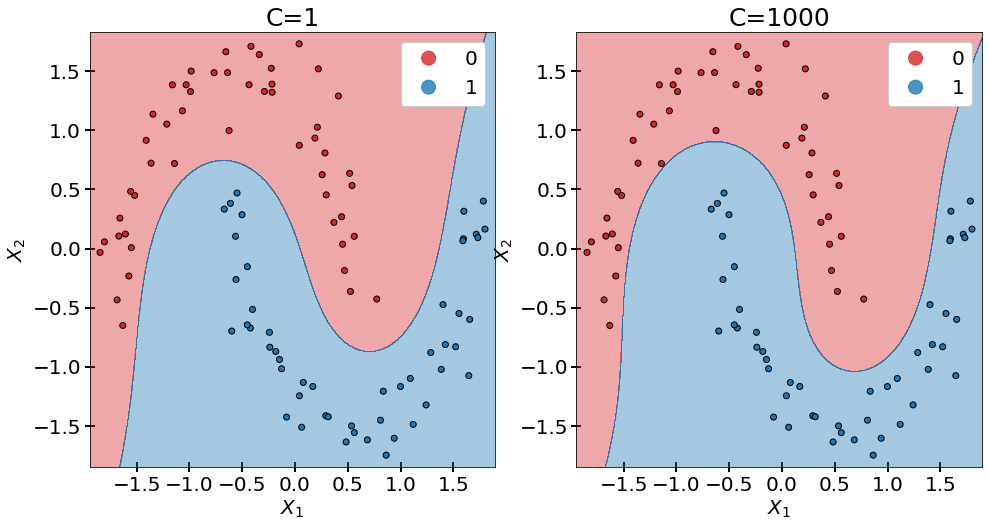

In [18]:
fig,axes=plt.subplots(1,2,figsize=(16,8))

ax=axes[0]

ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = np.min(X[:,0])-0.1, np.max(X[:,0]) +0.1
y_min, y_max = np.min(X[:,1])-0.1, np.max(X[:,1])+0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx_flat,yy_flat = xx.ravel(), yy.ravel()
X_grid = np.c_[xx_flat,yy_flat]
poly_X_grid = trans.transform(X_grid)

mean=poly_X_grid.mean(axis=0)
std=poly_X_grid.std(axis=0)
poly_X_grid=(poly_X_grid-mean)/std

zz = svc1.predict(poly_X_grid)
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)


ax=axes[1]


ax.scatter(X[:,0], X[:,1],marker='o', alpha=1, edgecolors='k', color=newcmap(y), zorder=3)

ax.set_xticks(np.arange(-2,2.1,0.5))
ax.set_yticks(np.arange(-2,2.1,0.5))
ax.set_xlabel('$X_1$', fontsize=20) 
ax.set_ylabel('$X_2$', fontsize=20)
ax.tick_params(direction='inout',size=10,width=2,labelsize=20)

patch = [mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(0), label = '0'),
        mpatches.Circle((0.5, 0.5), radius = 0.1, alpha=0.8, color = newcmap(1), label = '1')]
ax.legend(framealpha=1, handles = patch, fontsize = 20, handler_map={mpatches.Circle: HandlerEllipse()})

#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

h=0.005
x_min, x_max = np.min(X[:,0])-0.1, np.max(X[:,0]) +0.1
y_min, y_max = np.min(X[:,1])-0.1, np.max(X[:,1])+0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx_flat,yy_flat = xx.ravel(), yy.ravel()
X_grid = np.c_[xx_flat,yy_flat]
poly_X_grid = trans.transform(X_grid)

mean=poly_X_grid.mean(axis=0)
std=poly_X_grid.std(axis=0)
poly_X_grid=(poly_X_grid-mean)/std

zz = svc1000.predict(poly_X_grid)
zz=zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap=newcmap, alpha=0.4, zorder=2)

axes[0].set_title('C=1', fontsize=25)
axes[1].set_title('C=1000', fontsize=25)

plt.show()

------------------------------------
## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:

* you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels

* train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)

* generate prediction for the samples that were not used during the training

To-do now:

* build default SVC, but set it to predict probabilities
* plot the ROC curve and calculate the confusion matrix for the predictions
* do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
*how good is the performance of the new model?

In [19]:
df=pd.read_excel('aar3247_Cohen_SM_Tables-S1-S11.xlsx', 
                 sheet_name='Table S6', 
                 skiprows=2, 
                 skipfooter=4)

df=df.drop_duplicates()



df.pop('Sample ID #')
df.pop('AJCC Stage')
df.pop('Patient ID #')

df.dropna(axis=0, inplace=True)
SEEK=df.pop('CancerSEEK Logistic Regression Score')
SEEK_pred=df.pop('CancerSEEK Test Result')
y=df.pop('Tumor type').values



for i in df.columns.values:
    df[i] = df[i].astype(str).str.replace('*', '').astype(float)

assert np.array([pd.api.types.is_numeric_dtype(i) for i in df.dtypes.values[1:-2]]).all(), 'Not all the features are in numeric format.'

SEEK_labels=np.zeros_like(SEEK_pred, dtype=int)
SEEK_labels[SEEK_pred=='Positive']=1
SEEK_pred
labels=np.ones(len(y))
labels[y=='Normal']=0
X=df.values


<ipython-input-19-db67efdefa8d>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[i] = df[i].astype(str).str.replace('*', '').astype(float)


In [20]:
train_labels=labels[0::2]
test_labels=labels[1::2]

train_X=X[0::2,:]
test_X=X[1::2,:]

In [21]:
svc = SVC(probability=True) 
_=svc.fit(train_X,train_labels)

prob = svc.predict_proba(test_X) 
pred = svc.predict(test_X) 

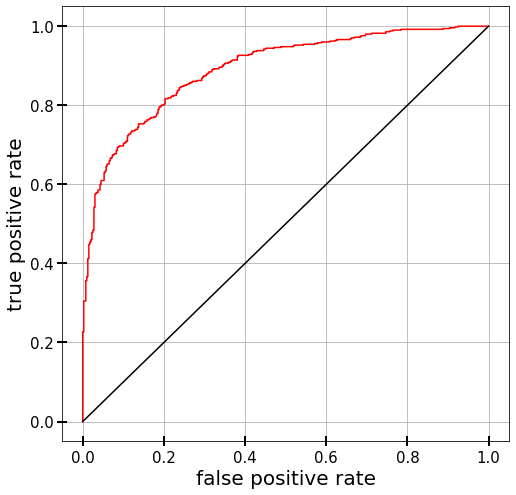

In [22]:
#ROC curve
from sklearn.metrics import roc_curve

fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(test_labels, prob[:,1])
ax.plot(fpr,tpr,'r-', label='CVM')


ax.plot([0,1],[0,1],'k')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
plt.show()

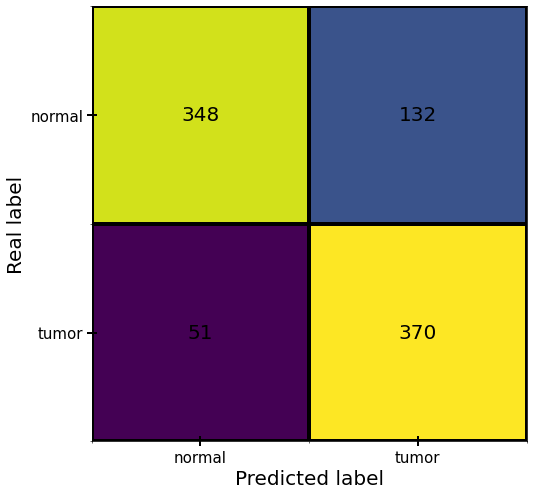

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels, pred)

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_ylabel('Real label', fontsize=20)
ax.set_xlabel('Predicted label', fontsize=20)

for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
plt.show()

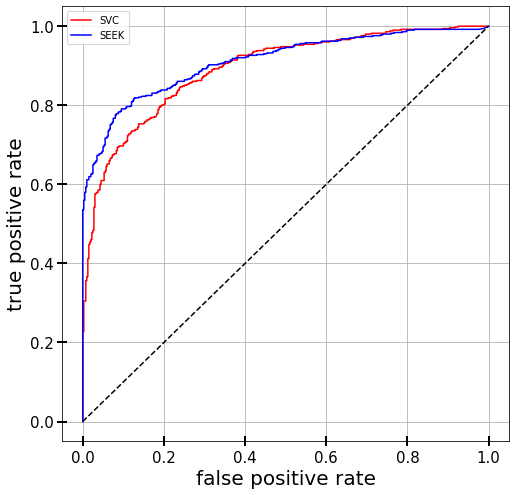

In [24]:
#ROC curve
from sklearn.metrics import roc_curve

fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(test_labels, prob[:,1])
fpr0,tpr0=fpr,tpr
ax.plot(fpr,tpr,'r-', label='SVC')

fpr,tpr,_ = roc_curve(test_labels, SEEK.values[1::2])
ax.plot(fpr,tpr,'b-', label='SEEK')

ax.plot([0,1],[0,1],'k', ls='--')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.legend()
ax.grid()
plt.show()

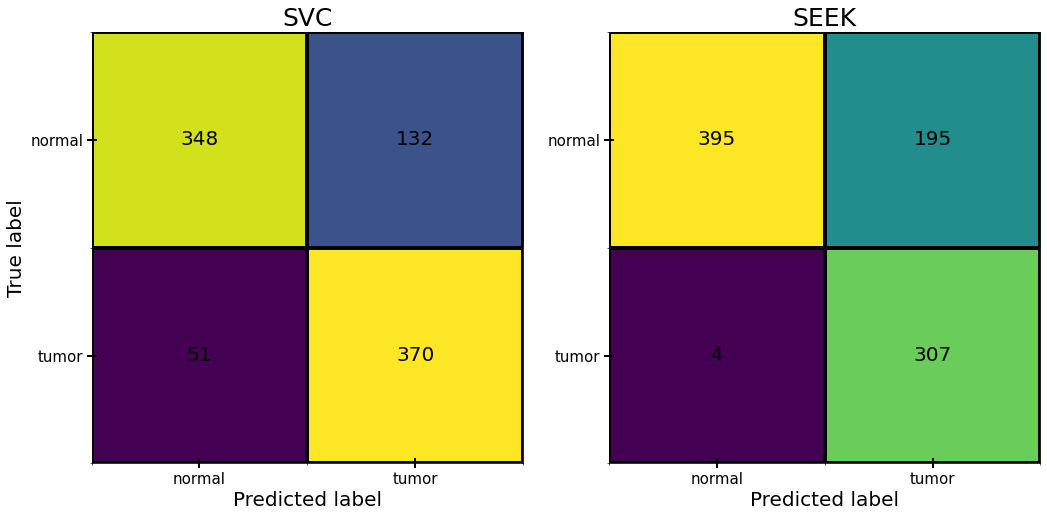

In [25]:
### from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels, pred)

fig,axes=plt.subplots(1,2,figsize=(17,8))
ax=axes[0]
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_ylabel('True label', fontsize=20)
ax.set_xlabel('Predicted label', fontsize=20)

for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        

ax=axes[1]
cm=confusion_matrix(test_labels, SEEK_labels[1::2])
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_xlabel('Predicted label', fontsize=20)
for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        
axes[0].set_title('SVC', fontsize=25)
axes[1].set_title('SEEK', fontsize=25)

plt.show()

--------------------------------
--------------------------------
## 4.) Scale data and try different kernels

* scale your data before applying the SVC model
* plot the ROC curve and calculate the confusion matrix for the predictions
* does your model perform better or worse after scaling?
* try out other kernels (linear, poly) and evaluate the performance of the model the same way

In [26]:
mean = train_X.mean(axis=0)
std = train_X.std(axis=0)

train_X = (train_X-mean)/std
test_X = (test_X-mean)/std

In [27]:
svc = SVC(probability=True) 
_=svc.fit(train_X,train_labels)

prob = svc.predict_proba(test_X) 
pred = svc.predict(test_X) 

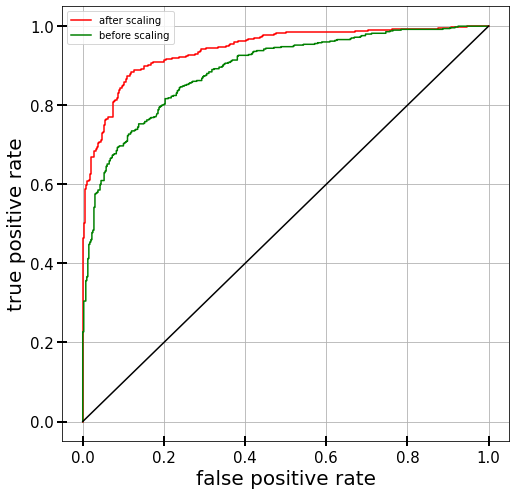

In [28]:
#ROC curve
fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(test_labels, prob[:,1])
ax.plot(fpr,tpr,'r-', label='after scaling')

ax.plot(fpr0,tpr0,'g-', label='before scaling')


ax.plot([0,1],[0,1],'k')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend()
plt.show()

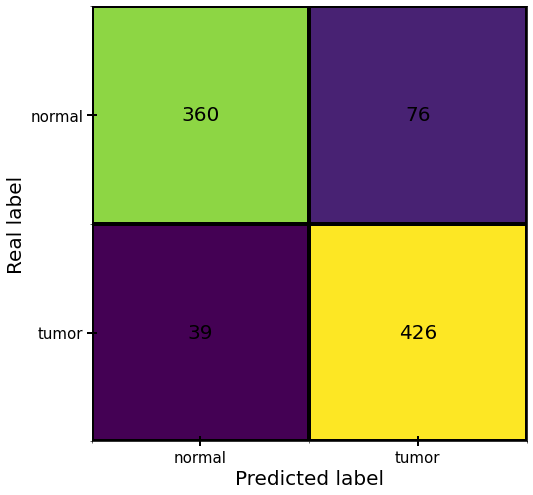

In [29]:
cm=confusion_matrix(test_labels, pred)

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_ylabel('Real label', fontsize=20)
ax.set_xlabel('Predicted label', fontsize=20)

for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
plt.show()

In [30]:
svc_rbf=SVC(probability=True) 
_=svc_rbf.fit(train_X,train_labels)

prob_rbf = svc.predict_proba(test_X) 
pred_rbf = svc.predict(test_X) 

####
svc_linear=SVC(probability=True, kernel='linear') 
_=svc_linear.fit(train_X,train_labels)

prob_linear=svc_linear.predict_proba(test_X) 
pred_linear=svc_linear.predict(test_X) 

###

svc_poly2=SVC(probability=True, kernel='poly', degree=2) 
_=svc_poly2.fit(train_X,train_labels)

prob_poly2=svc_poly2.predict_proba(test_X) 
pred_poly2=svc_poly2.predict(test_X) 

###

svc_poly3=SVC(probability=True, kernel='poly', degree=3) 
_=svc_poly3.fit(train_X,train_labels)

prob_poly3=svc_poly3.predict_proba(test_X) 
pred_poly3=svc_poly3.predict(test_X) 

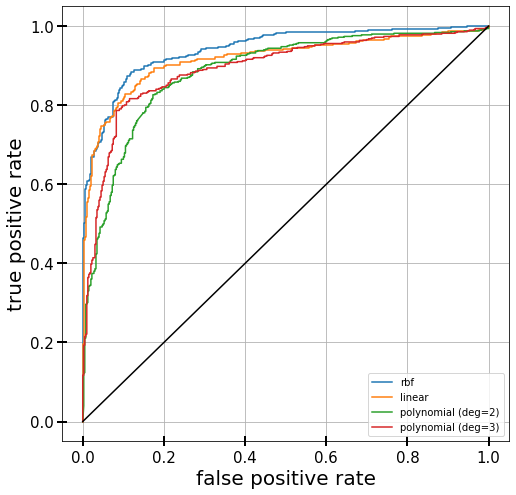

In [31]:
#ROC curve
fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(test_labels, prob_rbf[:,1])
ax.plot(fpr,tpr,'-', label='rbf')

fpr,tpr,_ = roc_curve(test_labels, prob_linear[:,1])
ax.plot(fpr,tpr,'-', label='linear')

fpr,tpr,_ = roc_curve(test_labels, prob_poly2[:,1])
ax.plot(fpr,tpr,'-', label='polynomial (deg=2)')

fpr,tpr,_ = roc_curve(test_labels, prob_poly3[:,1])
ax.plot(fpr,tpr,'-', label='polynomial (deg=3)')


ax.plot([0,1],[0,1],'k')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend()
plt.show()

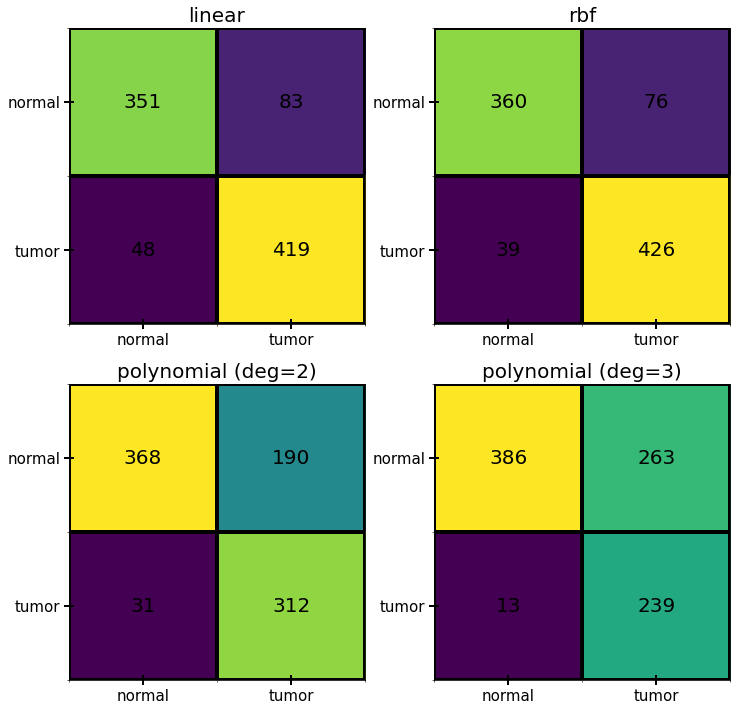

In [32]:


fig,axes=plt.subplots(2,2,figsize=(12,12))

ax=axes[0][0]
cm=confusion_matrix(test_labels, pred_linear)
ax.set_title('linear', fontsize=20)
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)



for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        
    
ax=axes[0][1]
cm=confusion_matrix(test_labels, pred_rbf)
ax.set_title('rbf', fontsize=20)
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)


for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)

        
ax=axes[1][0]
cm=confusion_matrix(test_labels, pred_poly2)
ax.set_title('polynomial (deg=2)', fontsize=20)
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)



for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        
        
ax=axes[1][1]
cm=confusion_matrix(test_labels, pred_poly3)
ax.set_title('polynomial (deg=3)', fontsize=20)
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)



for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        
plt.show()

--------------------
--------------------

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

* prepare data as described in the title, then scale all inputs based on the training set
* select your best performing SVC model from the previous exercise
* check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
* create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
* select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

In [33]:
index=np.arange(len(labels))
np.random.shuffle(index)
train_index,validate_index,test_index = np.split(index,np.array([int(0.7*len(labels))+1,int(0.85*len(labels))+1]), axis=0)

train_labels = labels[train_index]
validate_labels = labels[validate_index]
test_labels = labels[test_index]

train_X = X[train_index,:]
mean=(X[train_index,:]).mean(axis=0)
std=(X[train_index,:]).std(axis=0)

train_X=(train_X-mean)/std
validate_X = (X[validate_index,:]-mean)/std
test_X = (X[test_index,:]-mean)/std

In [34]:
from sklearn.metrics import roc_auc_score

def fun(train_data,train_labels,test_data,test_labels, C=1,g='scale', tol=1e-3):
    svc = SVC(probability=True,kernel='rbf',C=C,gamma=g, tol=tol) 
    _=svc.fit(train_data,train_labels)
    prob = svc.predict_proba(test_data) 
    return roc_auc_score(test_labels,prob[:,1])
    
    

In [35]:
CC=np.linspace(1e-5,1e2,100)
AUC=np.empty(len(CC))
for i,c in enumerate(CC):
    AUC[i]=fun(train_X,train_labels,validate_X,validate_labels,C=c,g=0.0272)


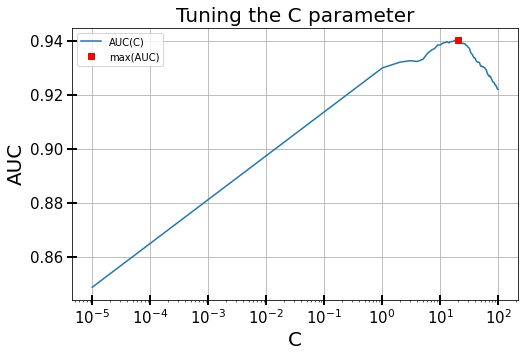

Best value: 20.20202818181818


In [36]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(CC,AUC,label='AUC(C)')
ax.plot(CC[np.argmax(AUC)],AUC[np.argmax(AUC)], 'rs', label='max(AUC)')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel( 'AUC', fontsize = 20)
ax.set_xlabel( 'C', fontsize = 20)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)
ax.set_title('Tuning the C parameter', fontsize=20)
ax.grid()
ax.legend()
plt.show()

print('Best value:', CC[np.argmax(AUC)])
best_c= CC[np.argmax(AUC)]

In [37]:
GG=np.linspace(1e-5,1,100)
AUC=np.empty(len(GG))
for i,g in enumerate(GG):
    AUC[i]=fun(train_X,train_labels,validate_X,validate_labels,C=5.722, g=g)

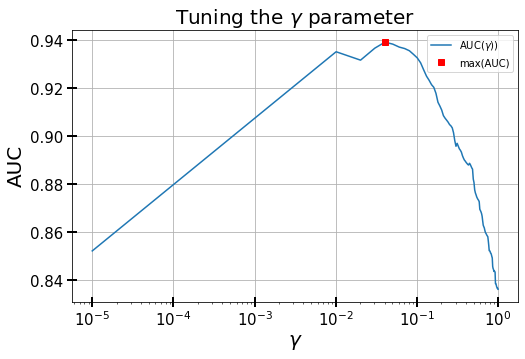

Best value: 0.04041363636363637


In [38]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(GG,AUC,label='AUC($\gamma$))')
ax.plot(GG[np.argmax(AUC)],AUC[np.argmax(AUC)], 'rs',label='max(AUC)')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel( 'AUC', fontsize = 20)
ax.set_xlabel( '$\gamma$', fontsize = 20)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)
ax.set_title('Tuning the $\gamma$ parameter', fontsize=20)
ax.grid()
ax.legend()
plt.show()

print('Best value:', GG[np.argmax(AUC)])
best_g=GG[np.argmax(AUC)]

In [39]:
TOL=np.logspace(-5,2,100)
AUC=np.empty(len(TOL))
for i,t in enumerate(TOL):
    AUC[i]=fun(train_X,train_labels,validate_X,validate_labels, tol=t)


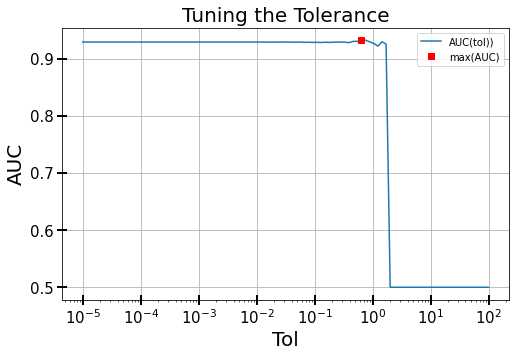

Best value: 0.642807311728432


In [40]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(TOL,AUC,label='AUC(tol))')
ax.plot(TOL[np.argmax(AUC)],AUC[np.argmax(AUC)], 'rs', label='max(AUC)')
ax.set_xscale('log')
ax.set_ylabel( 'AUC', fontsize = 20)
ax.set_xlabel( 'Tol', fontsize = 20)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)
ax.set_title('Tuning the Tolerance', fontsize=20)
ax.grid()
ax.legend()
plt.show()

print('Best value:', TOL[np.argmax(AUC)])
best_t= TOL[np.argmax(AUC)]

In [41]:
CC=np.linspace(1e-5,1e2,100)
test_AUC=np.empty(len(CC))
train_AUC=np.empty(len(CC))
validate_AUC=np.empty(len(CC))

for i,c in enumerate(CC):
    validate_AUC[i]=fun(train_X,train_labels,validate_X,validate_labels,C=c,g=0.0272)
    train_AUC[i]=fun(train_X,train_labels,train_X,train_labels,C=c,g=0.0272)
    test_AUC[i]=fun(train_X,train_labels,test_X,test_labels,C=c,g=0.0272)

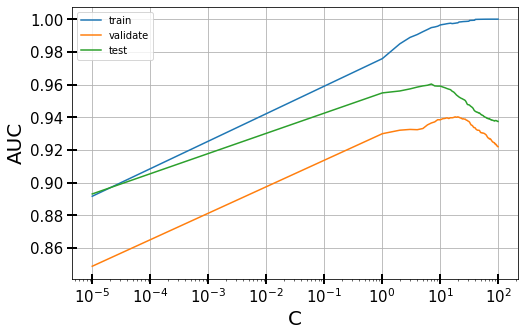

In [42]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(CC,train_AUC,label='train')
ax.plot(CC,validate_AUC,label='validate')
ax.plot(CC,test_AUC,label='test')

#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel( 'AUC', fontsize = 20)
ax.set_xlabel( 'C', fontsize = 20)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)
ax.grid()
ax.legend()

plt.show()

In [43]:
GG=np.linspace(1e-5,1,100)
AUC=np.empty(len(GG))

for i,g in enumerate(GG):
    validate_AUC[i]=fun(train_X,train_labels,validate_X,validate_labels,C=best_c,g=g)
    train_AUC[i]=fun(train_X,train_labels,train_X,train_labels,C=best_c,g=g)
    test_AUC[i]=fun(train_X,train_labels,test_X,test_labels,C=best_c,g=g)

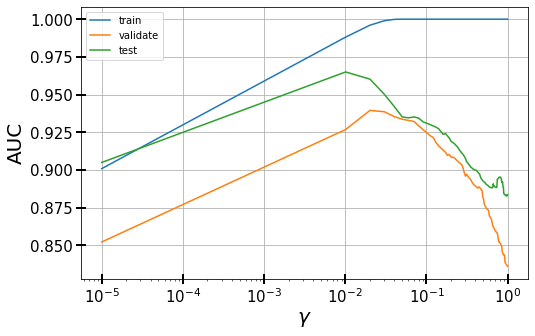

In [44]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(GG,train_AUC,label='train')
ax.plot(GG,validate_AUC,label='validate')
ax.plot(GG,test_AUC,label='test')

ax.set_xscale('log')
ax.set_ylabel( 'AUC', fontsize = 20)
ax.set_xlabel( '$\\gamma$', fontsize = 20)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)
ax.grid()
ax.legend()

plt.show()

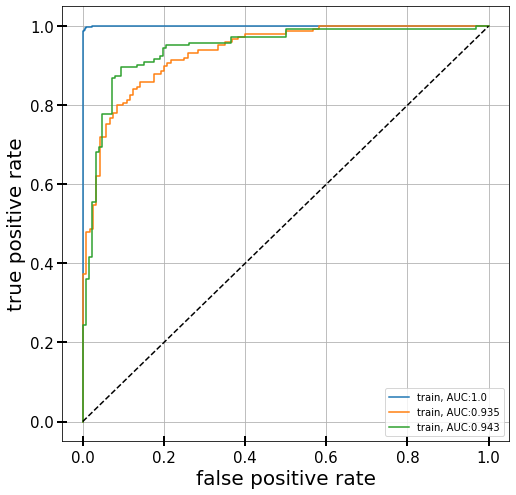

In [45]:
svc = SVC(probability=True, gamma=best_g, C=best_c,tol=best_t) 
_=svc.fit(train_X,train_labels)

fig,ax = plt.subplots(1,1,figsize=(8,8))

prob = svc.predict_proba(train_X) 
fpr,tpr,_ = roc_curve(train_labels, prob[:,1])
ax.plot(fpr,tpr,'-', label='train, AUC:'+str(np.round(roc_auc_score(train_labels, prob[:,1]),3)))

prob = svc.predict_proba(validate_X) 
fpr,tpr,_ = roc_curve(validate_labels, prob[:,1])
ax.plot(fpr,tpr,'-', label='train, AUC:'+str(np.round(roc_auc_score(validate_labels, prob[:,1]),3)))

prob = svc.predict_proba(test_X) 
fpr,tpr,_ = roc_curve(test_labels, prob[:,1])
ax.plot(fpr,tpr,'-', label='train, AUC:'+str(np.round(roc_auc_score(test_labels, prob[:,1]),3)))

ax.plot([0,1],[0,1],'k', ls='--')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.legend()
ax.grid()
plt.show()

In [46]:
svc = SVC(probability=True, gamma=best_g, C=best_c,tol=best_t) 
_=svc.fit(train_X,train_labels)

prob = svc.predict_proba(test_X) 
pred = svc.predict(test_X) 

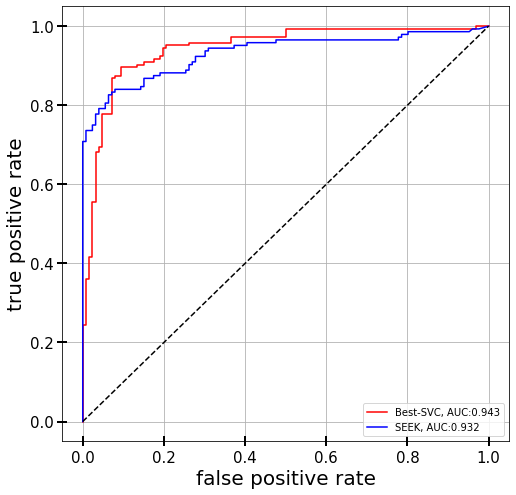

In [47]:
#ROC curve
fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(test_labels, prob[:,1])
ax.plot(fpr,tpr,'r-', label='Best-SVC, AUC:'+str(np.round(roc_auc_score(test_labels, prob[:,1]),3)))

fpr,tpr,_ = roc_curve(test_labels, SEEK.values[test_index])
ax.plot(fpr,tpr,'b-', label='SEEK, AUC:'+str(np.round(roc_auc_score(test_labels, SEEK.values[test_index]),3)))

ax.plot([0,1],[0,1],'k', ls='--')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.legend()
ax.grid()
plt.show()

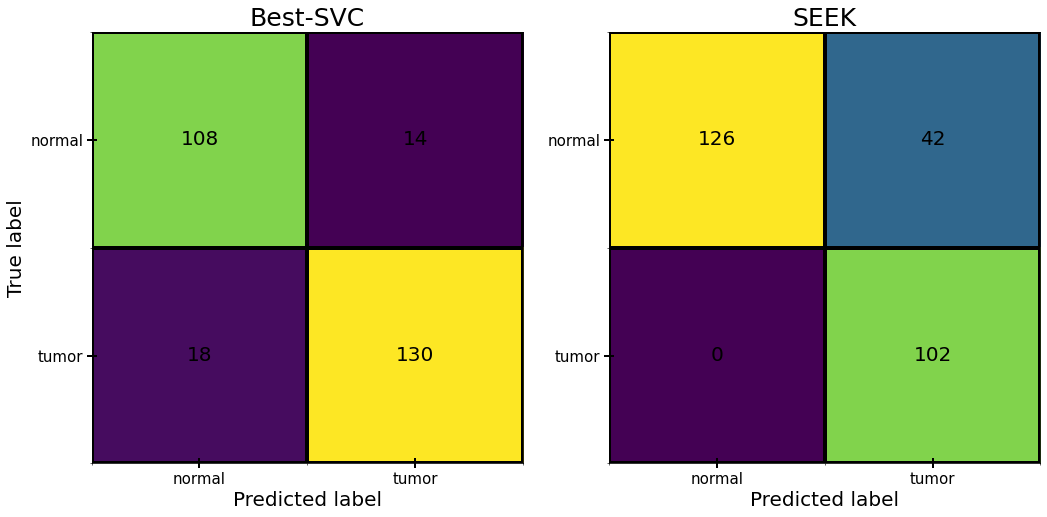

In [48]:
### from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels, pred)

fig,axes=plt.subplots(1,2,figsize=(17,8))
ax=axes[0]
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_ylabel('True label', fontsize=20)
ax.set_xlabel('Predicted label', fontsize=20)

for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        

ax=axes[1]
cm=confusion_matrix(test_labels, SEEK_labels[test_index])
ax.imshow(cm.T)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['normal','tumor'])

ax.set_yticks(np.arange(2))
ax.set_yticklabels(['normal','tumor'])


ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, 2,1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

ax.set_xlabel('Predicted label', fontsize=20)
for i in np.arange(0,2,1):
    for j in np.arange(0,2,1):
        ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
        
axes[0].set_title('Best-SVC', fontsize=25)
axes[1].set_title('SEEK', fontsize=25)

plt.show()